# Smart Entertainment System Using IoT and Deep Learning


## Subject: SEP 769:Cyber Physical Systems


### Team Members
1. Jaimis Miyani (400551743)
2. Kenil Sachapara (400551600)
3. Om Kakadiya (400551508)
4. Yash Patel (400551627)

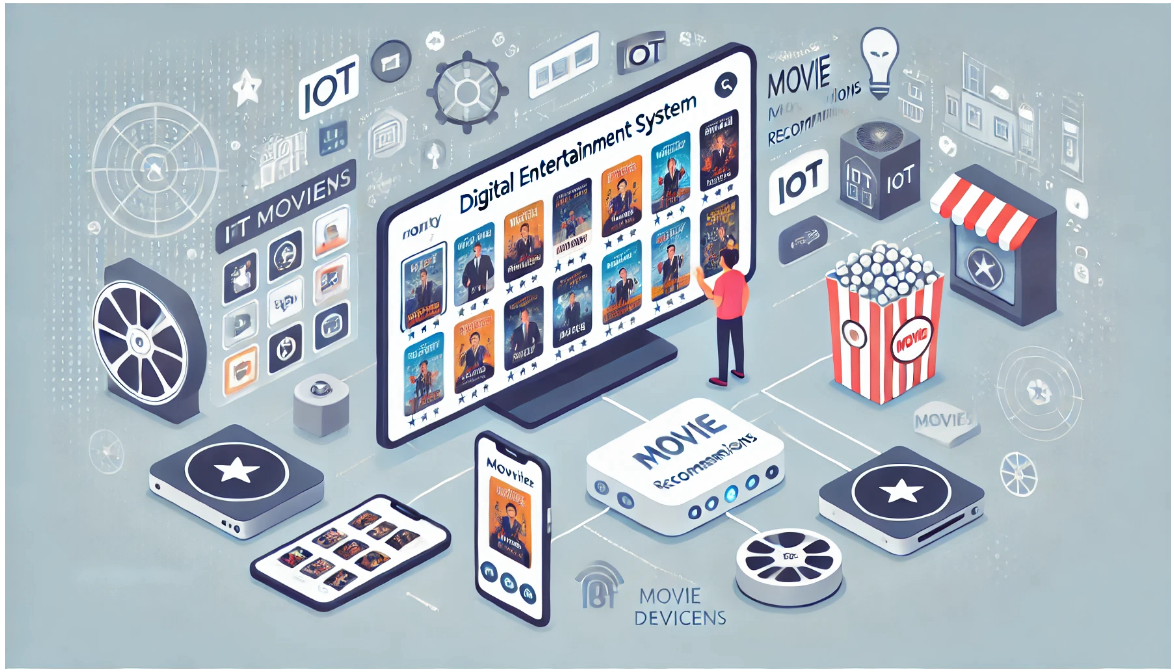

# Step 1: Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Load the dataset
df = pd.read_csv('trending.csv')

# Display basic info
print(df.info())

# Check for null values
print(df.isnull().sum())

# Handle missing values by dropping rows with missing values
df = df.dropna()

# Ensure 'release_date' is in datetime format
df['release_date'] = pd.to_datetime(df['release_date'])

# Extract 'release_year' from 'release_date'
df['release_year'] = df['release_date'].dt.year

# Detect outliers using z-score
z_scores = np.abs(stats.zscore(df.select_dtypes(include=np.number)))
outliers = (z_scores > 3).sum(axis=1)
print(f"Number of outliers detected: {sum(outliers > 0)}")

# Remove outliers
df = df[(z_scores < 3).all(axis=1)]

# Encode categorical features
label_encoder = LabelEncoder()
df['original_language'] = label_encoder.fit_transform(df['original_language'])

# Feature and target variables
X = df[['popularity', 'vote_count', 'release_year', 'original_language']]
y = df['vote_average']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print original feature values (first 5 rows for brevity)
print("Original feature values (first 5 rows):")
print(X_train[:5])

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Print standardized feature values (first 5 rows for brevity)
print("Standardized feature values (first 5 rows):")
print(X_train[:5])


# Display the first few rows of the dataframe to understand its structure
df.head()

# Data Preprocessing
# Normalize numerical features like popularity and vote average
scaler = MinMaxScaler()
df['normalized_popularity'] = scaler.fit_transform(df[['popularity']])
df['normalized_vote_average'] = scaler.fit_transform(df[['vote_average']])

# Encode categorical features like original language and media type
encoder = LabelEncoder()
df['encoded_language'] = encoder.fit_transform(df['original_language'])
df['encoded_media_type'] = encoder.fit_transform(df['media_type'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16080 entries, 0 to 16079
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         16080 non-null  int64  
 1   id                 16080 non-null  int64  
 2   original_title     12060 non-null  object 
 3   original_language  16080 non-null  object 
 4   release_date       12060 non-null  object 
 5   popularity         16080 non-null  float64
 6   vote_average       16080 non-null  float64
 7   vote_count         16080 non-null  int64  
 8   media_type         16080 non-null  object 
 9   adult              16080 non-null  bool   
dtypes: bool(1), float64(2), int64(3), object(4)
memory usage: 1.1+ MB
None
Unnamed: 0              0
id                      0
original_title       4020
original_language       0
release_date         4020
popularity              0
vote_average            0
vote_count              0
media_type              0
adult

# Step 2: Exploratory Data Analysis (EDA)

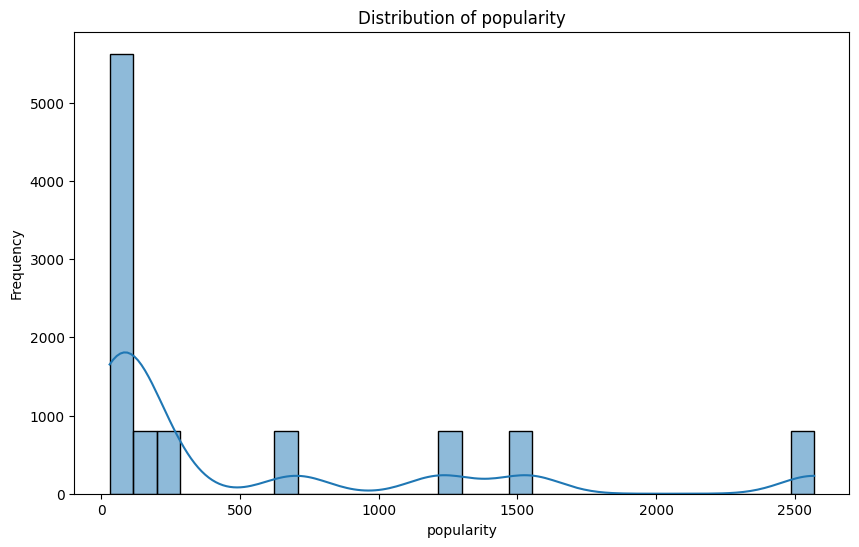

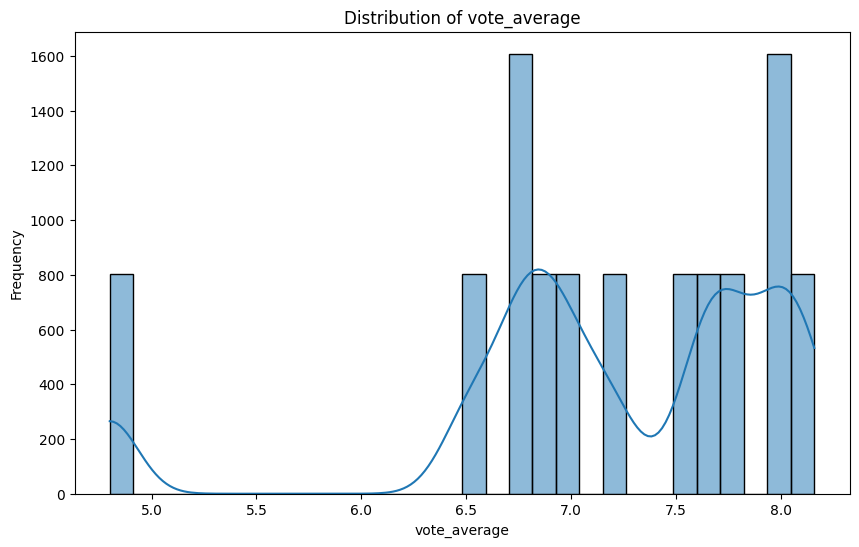

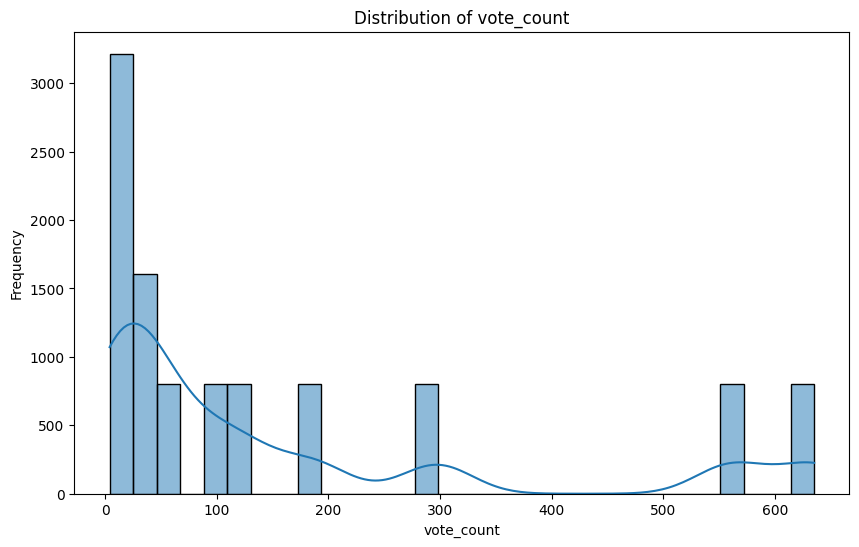

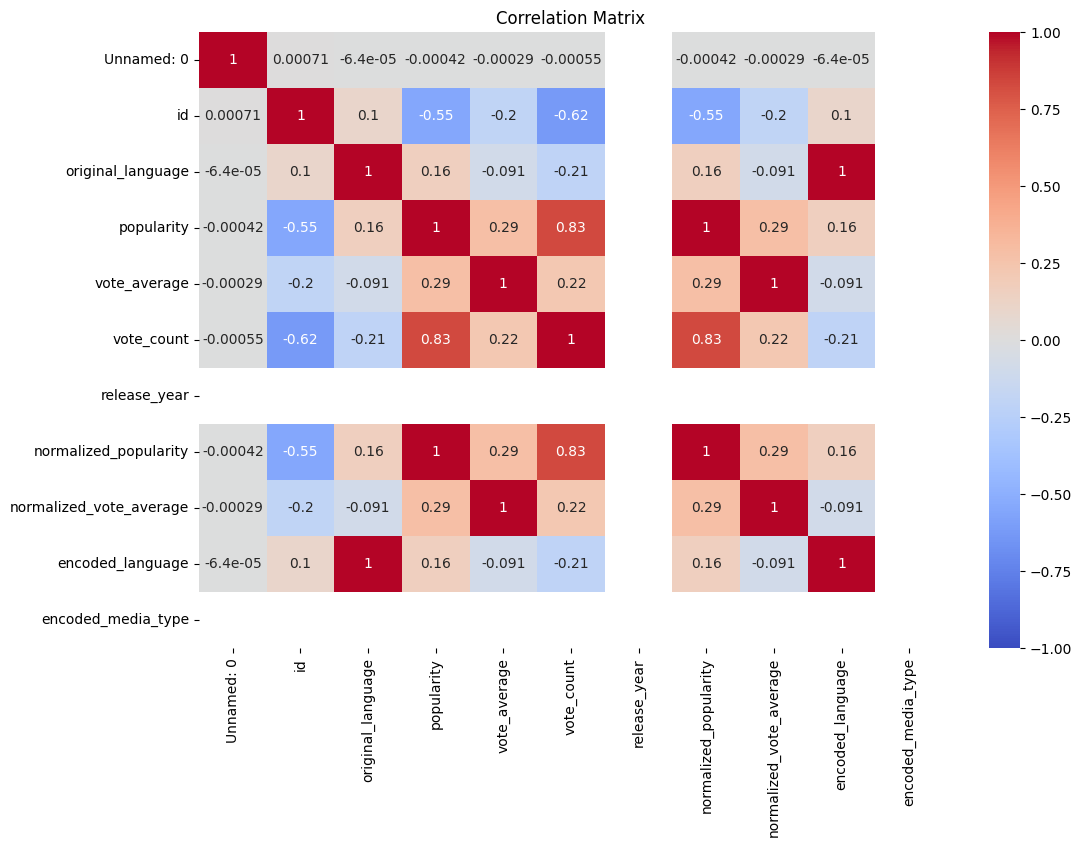

<ipython-input-28-9908422bc77c>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='original_language', data=df, palette='viridis')


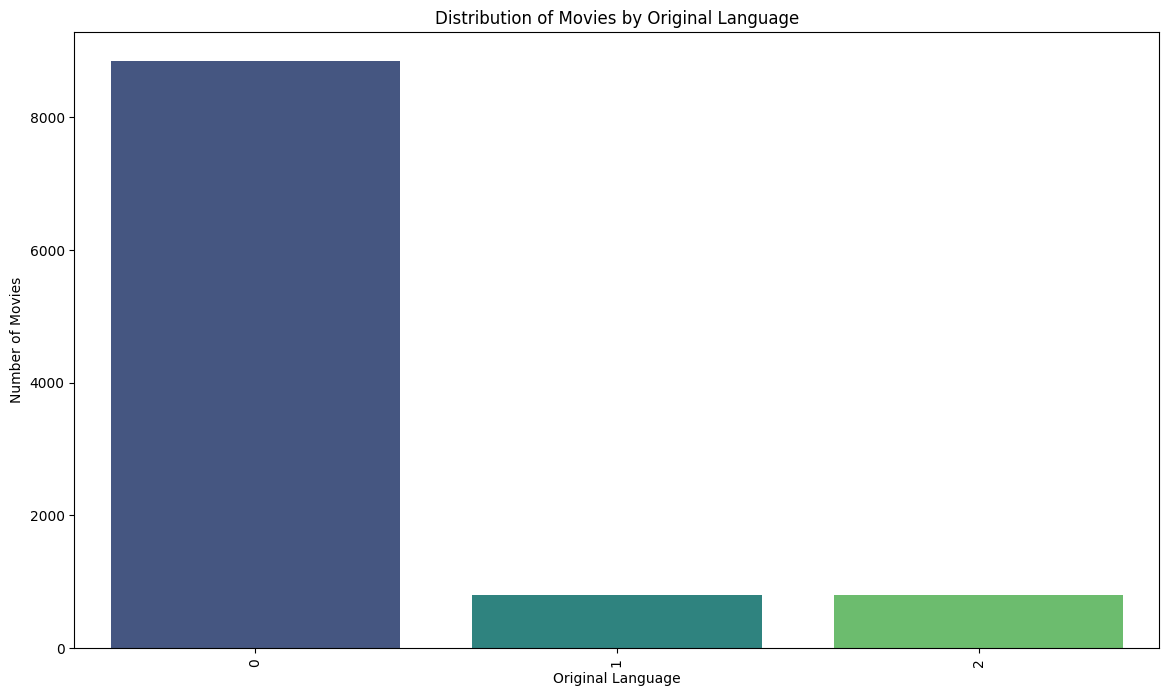

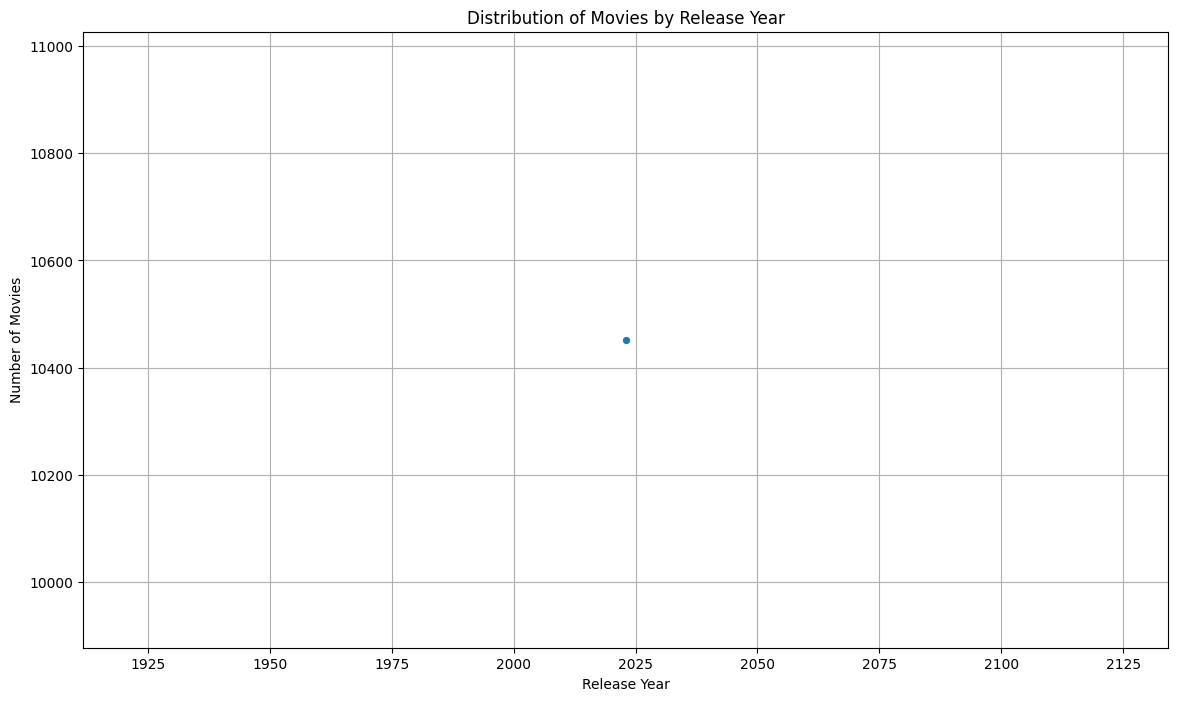

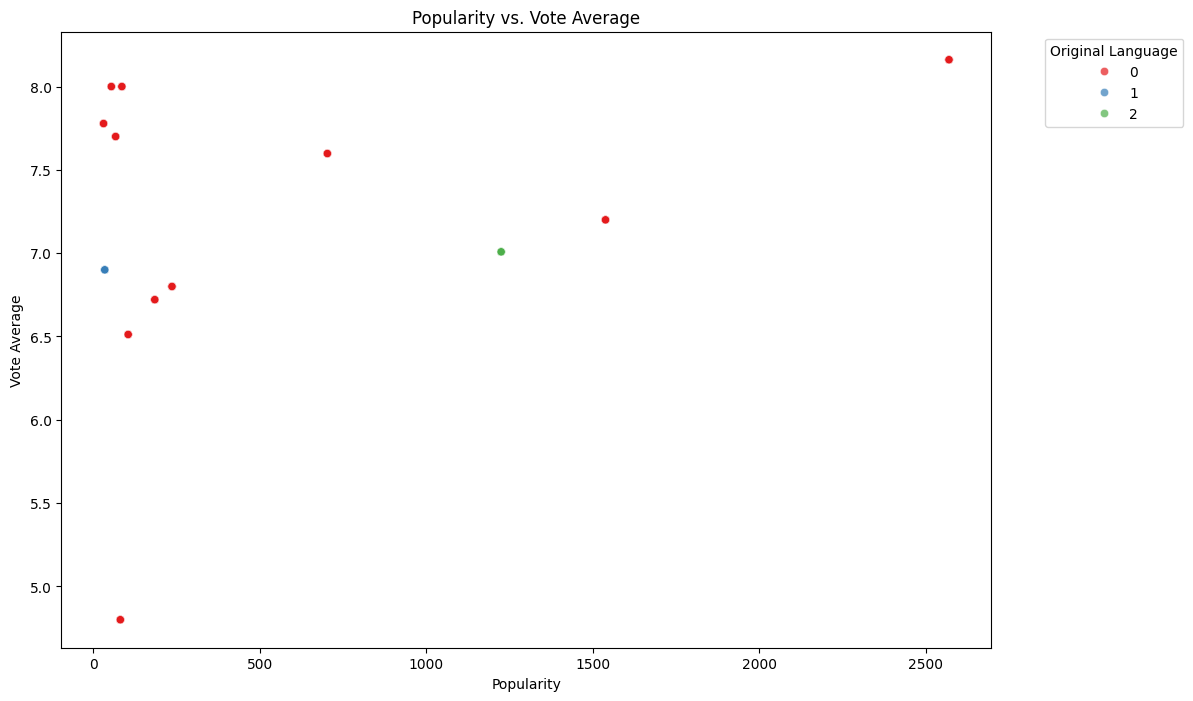

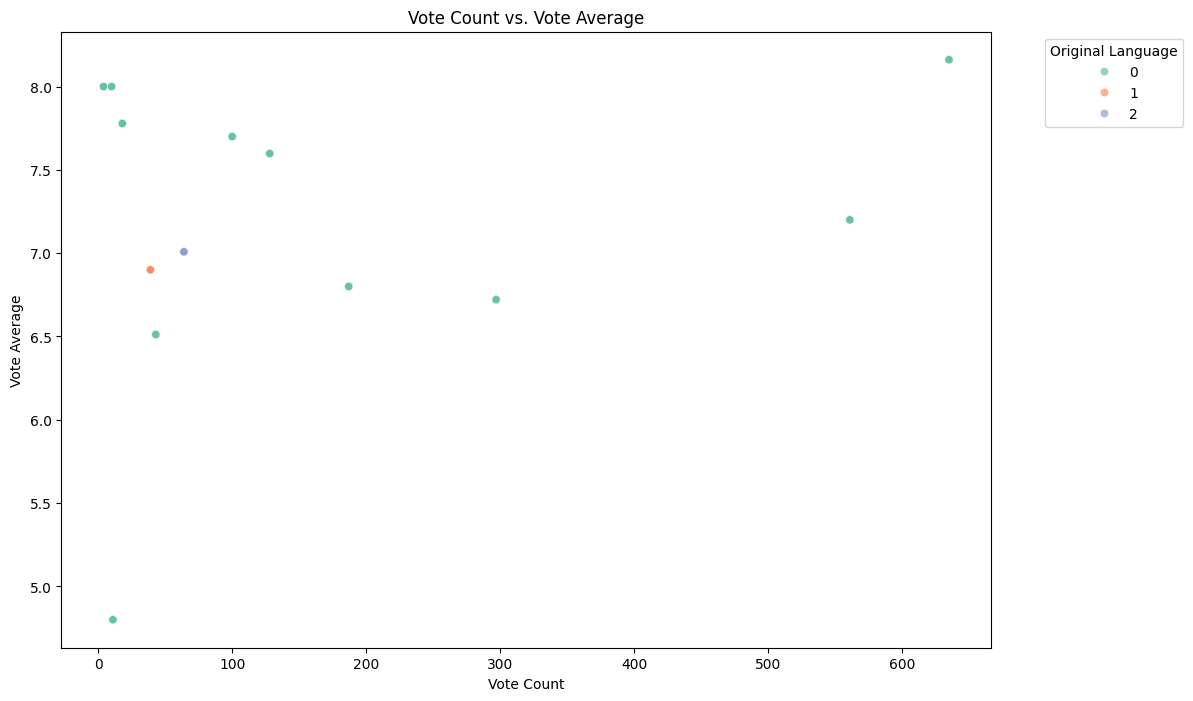

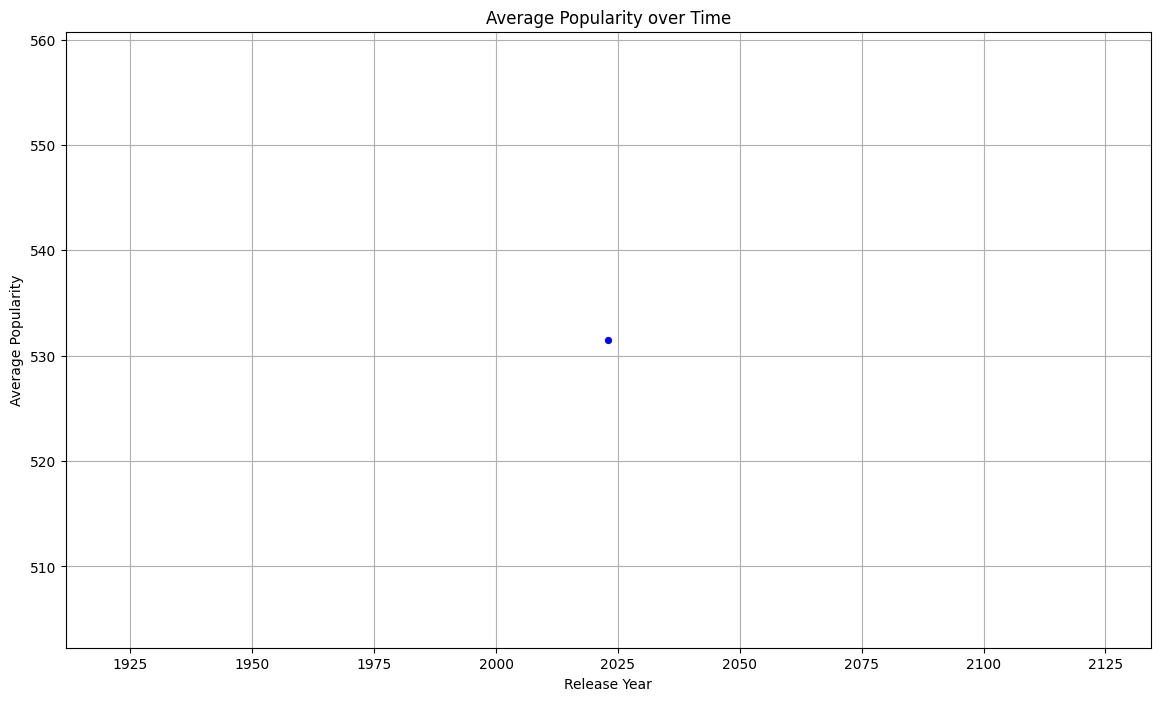

In [ ]:
# Visualization: Distribution of numerical features
numerical_features = ['popularity', 'vote_average', 'vote_count']

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Only include numeric columns for the correlation matrix
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Correlation matrix
correlation_matrix = df[numeric_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Categorical feature analysis: Language distribution
plt.figure(figsize=(14, 8))
sns.countplot(x='original_language', data=df, palette='viridis')
plt.title('Distribution of Movies by Original Language')
plt.xlabel('Original Language')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.show()

# Yearly analysis: Movies by release year
release_year_distribution = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(14, 8))
sns.lineplot(x=release_year_distribution.index, y=release_year_distribution.values, marker='o')
plt.title('Distribution of Movies by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

# Scatter plots for numerical features relationships
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='popularity', y='vote_average', hue='original_language', palette='Set1', alpha=0.7)
plt.title('Popularity vs. Vote Average')
plt.xlabel('Popularity')
plt.ylabel('Vote Average')
plt.legend(title='Original Language', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='vote_count', y='vote_average', hue='original_language', palette='Set2', alpha=0.7)
plt.title('Vote Count vs. Vote Average')
plt.xlabel('Vote Count')
plt.ylabel('Vote Average')
plt.legend(title='Original Language', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Popularity over time
popularity_over_time = df.groupby('release_year')['popularity'].mean().reset_index()
plt.figure(figsize=(14, 8))
sns.lineplot(data=popularity_over_time, x='release_year', y='popularity', marker='o', color='blue')
plt.title('Average Popularity over Time')
plt.xlabel('Release Year')
plt.ylabel('Average Popularity')
plt.grid(True)
plt.show()


In [ ]:
pip install keras-tuner


# Step 3: Model Training: Neural Collaborative Filtering (NCF)

In [ ]:
# Import libraries for NCF
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Concatenate, Dense

# Define the NCF model
num_users = df['id'].nunique()
num_items = df['id'].nunique()

# Input layers for user and item
user_input = Input(shape=(1,))
item_input = Input(shape=(1,))

# Embedding layers for users and items
user_embedding = Embedding(input_dim=num_users, output_dim=50)(user_input)
item_embedding = Embedding(input_dim=num_items, output_dim=50)(item_input)

# Flatten the embedding layers
user_vec = Flatten()(user_embedding)
item_vec = Flatten()(item_embedding)

# Concatenate user and item vectors and add dense layers
concat = Concatenate()([user_vec, item_vec])
dense = Dense(128, activation='relu')(concat)
ncf_output = Dense(1, activation='sigmoid')(dense)

# Compile the NCF model
ncf_model = Model([user_input, item_input], ncf_output)
ncf_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Simulated training data (in practice, use real user-item interaction data)
import numpy as np

train_user_ids = np.random.randint(0, num_users, size=10000)
train_item_ids = np.random.randint(0, num_items, size=10000)
train_labels = np.random.randint(0, 2, size=10000)

# Train the NCF model
ncf_model.fit([train_user_ids, train_item_ids], train_labels, epochs=10, validation_split=0.2)


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.5082 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5316 - loss: 0.6916 - val_accuracy: 0.5035 - val_loss: 0.6948
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5419 - loss: 0.6897 - val_accuracy: 0.4955 - val_loss: 0.6946
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5333 - loss: 0.6896 - val_accuracy: 0.4900 - val_loss: 0.6987
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5298 - loss: 0.6900 - val_accuracy: 0.4960 - val_loss: 0.6988
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5421 - loss: 0.6891 - val_accuracy: 0.4845 - val_loss: 0.6995
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5438 - loss: 0.6866 - val_accuracy: 0.4950 - val_loss: 0.6993
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5478 - loss: 0.6875 - val_accuracy: 0

# Step 4: Model Training: Convolutional Neural Network (CNN)

Training with params: optimizer=adam, filters=32, kernel_size=3, pool_size=2, dense_units=100, dropout_rate=0.3, batch_size=32, epochs=10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
209/209 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.5086 - loss: 1.0661 - val_accuracy: 0.5081 - val_loss: 0.6931
Epoch 2/10
209/209 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.4982 - loss: 0.6932 - val_accuracy: 0.5081 - val_loss: 0.6931
Epoch 3/10
209/209 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4924 - loss: 0.6932 - val_accuracy: 0.5081 - val_loss: 0.6931
Epoch 4/10
209/209 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5003 - loss: 0.6932 - val_accuracy: 0.5081 - val_loss: 0.6931
Epoch 5/10
209/209 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.4996 - loss: 0.6932 - val_accuracy: 0.5081 - val_loss: 0.6931
Epoch 6/10
209/209 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.5003 - loss: 0.6932 - val_accuracy: 0.5081 - val_loss: 0.6931
Epoch 7/10
209/209 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5017 - loss: 0.6932 - val_accuracy: 0.5081 - val_loss: 0.6931
Epoch 8/10
209/209 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5108 - loss: 0.6931 - val_accuracy:

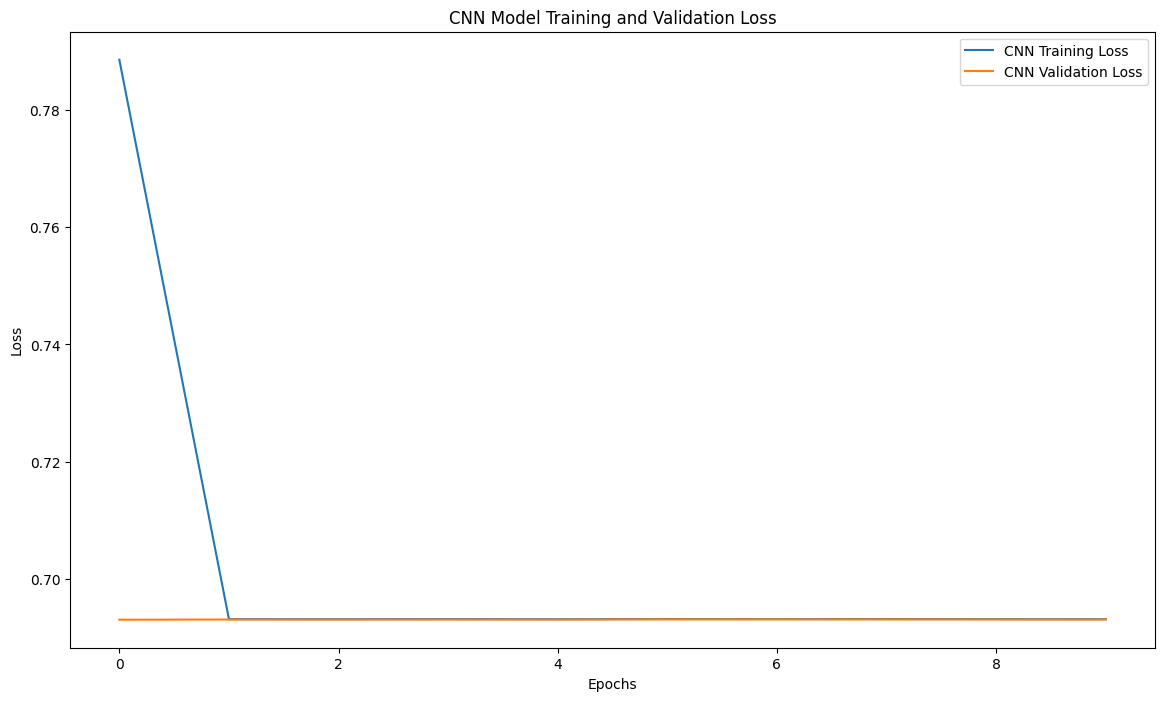

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Create CNN Model
def create_cnn_model(optimizer='adam', filters=32, kernel_size=3, pool_size=2, dense_units=100, dropout_rate=0.3):
    model = Sequential([
        Conv2D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=(64, 64, 3)),
        MaxPooling2D(pool_size=pool_size),
        Flatten(),
        Dense(dense_units, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Simulated data for demonstration
X_train = np.random.randint(0, 256, (8361, 64, 64, 3), dtype=np.uint8)
y_train = np.random.randint(0, 2, (8361, 1))
X_test = np.random.randint(0, 256, (2000, 64, 64, 3), dtype=np.uint8)
y_test = np.random.randint(0, 2, (2000, 1))

# Normalize pixel values
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Hyperparameters
optimizer = 'adam'
filters = 32
kernel_size = 3
pool_size = 2
dense_units = 100
dropout_rate = 0.3
batch_size = 32
epochs = 10

print(f"Training with params: optimizer={optimizer}, filters={filters}, kernel_size={kernel_size}, pool_size={pool_size}, dense_units={dense_units}, dropout_rate={dropout_rate}, batch_size={batch_size}, epochs={epochs}")

# Create and train the model
model = create_cnn_model(optimizer, filters, kernel_size, pool_size, dense_units, dropout_rate)
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# Evaluate the model
cnn_predictions = model.predict(X_test)
cnn_rmse = mean_squared_error(y_test, cnn_predictions, squared=False)
cnn_mae = mean_absolute_error(y_test, cnn_predictions)
cnn_r2 = r2_score(y_test, cnn_predictions)

print(f'CNN RMSE: {cnn_rmse}')
print(f'CNN MAE: {cnn_mae}')
print(f'CNN R2: {cnn_r2}')

# Visualization
plt.figure(figsize=(14, 8))
plt.plot(history.history['loss'], label='CNN Training Loss')
plt.plot(history.history['val_loss'], label='CNN Validation Loss')
plt.title('CNN Model Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


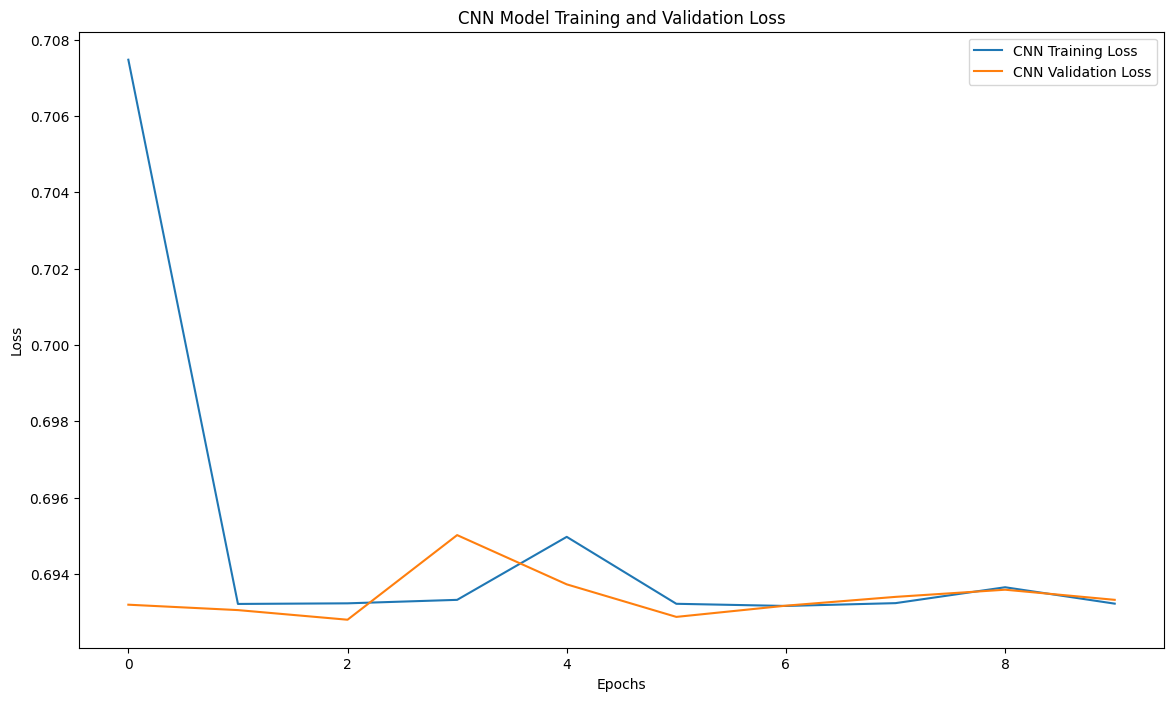

In [ ]:
import matplotlib.pyplot as plt

# Visualize model performance
plt.figure(figsize=(14, 8))
plt.plot(cnn_history.history['loss'], label='CNN Training Loss')
plt.plot(cnn_history.history['val_loss'], label='CNN Validation Loss')
plt.title('CNN Model Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# 5: Model Training: Recurrent Neural Network (RNN)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


209/209 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5100 - loss: 0.6943 - val_accuracy: 0.5158 - val_loss: 0.6930
Epoch 2/10
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5052 - loss: 0.6936 - val_accuracy: 0.5194 - val_loss: 0.6931
Epoch 3/10
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5097 - loss: 0.6930 - val_accuracy: 0.5206 - val_loss: 0.6931
Epoch 4/10
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5162 - loss: 0.6925 - val_accuracy: 0.4985 - val_loss: 0.6937
Epoch 5/10
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5261 - loss: 0.6925 - val_accuracy: 0.5123 - val_loss: 0.6930
Epoch 6/10
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5241 - loss: 0.6920 - val_accuracy: 0.4997 - val_loss: 0.6934
Epoch 7/10
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5192 - loss: 0.6916 - val_accuracy: 0.5045 - val_loss: 0.6939
Epoch 8/10
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5245 - loss: 0.6916 - val_accuracy: 0.5075 - val_

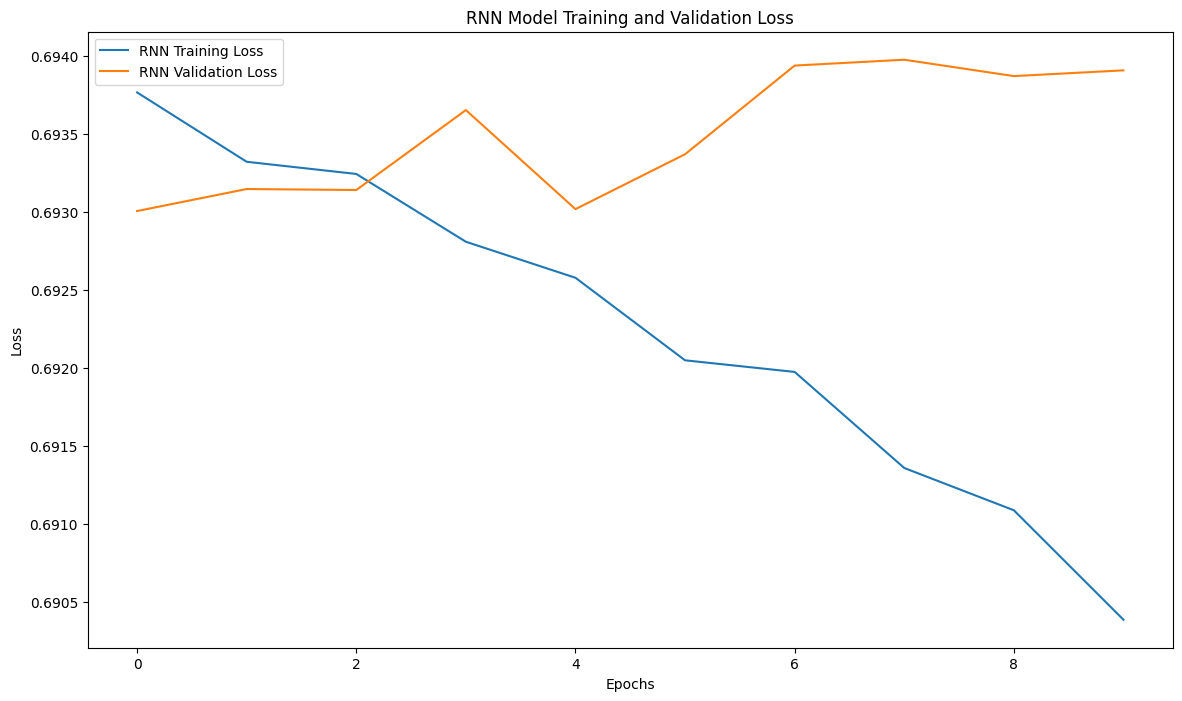

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# 1. Prepare Data for RNN

# Simulate sequential data for RNN (e.g., time series data)
# Assume we have 8361 training samples and 2000 test samples
time_steps = 10  # Number of time steps in each sequence
features = 1     # Number of features at each time step

# Example random sequential data (replace this with your actual data)
X_train_rnn = np.random.rand(8361, time_steps, features)  # Random sequential training data
X_test_rnn = np.random.rand(2000, time_steps, features)   # Random sequential test data
y_train = np.random.randint(0, 2, (8361, 1))              # Random binary labels for training
y_test = np.random.randint(0, 2, (2000, 1))               # Random binary labels for testing

# 2. Define the RNN Model

rnn_model = Sequential([
    SimpleRNN(128, input_shape=(time_steps, features), activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification
])

# 3. Compile the RNN Model

rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 4. Train the RNN Model

rnn_history = rnn_model.fit(X_train_rnn, y_train, epochs=10, batch_size=32, validation_split=0.2)

# 5. Evaluate the RNN Model

rnn_predictions = rnn_model.predict(X_test_rnn)
rnn_rmse = mean_squared_error(y_test, rnn_predictions, squared=False)
rnn_mae = mean_absolute_error(y_test, rnn_predictions)
rnn_r2 = r2_score(y_test, rnn_predictions)

print(f'RNN RMSE: {rnn_rmse}')
print(f'RNN MAE: {rnn_mae}')
print(f'RNN R2: {rnn_r2}')

# 6. Visualize the Training and Validation Loss

plt.figure(figsize=(14, 8))
plt.plot(rnn_history.history['loss'], label='RNN Training Loss')
plt.plot(rnn_history.history['val_loss'], label='RNN Validation Loss')
plt.title('RNN Model Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_cnn_model(optimizer, filters, kernel_size, pool_size, dense_units, dropout_rate):
    model = Sequential([
        Conv2D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=(64, 64, 3)),
        MaxPooling2D(pool_size=pool_size),
        Flatten(),
        Dense(dense_units, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')  # For binary classification
    ])

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Example usage
optimizer = 'adam'
filters = 32
kernel_size = 3
pool_size = 2
dense_units = 100
dropout_rate = 0.3
batch_size = 32
epochs = 10

print(f"Training with params: optimizer={optimizer}, filters={filters}, kernel_size={kernel_size}, pool_size={pool_size}, dense_units={dense_units}, dropout_rate={dropout_rate}, batch_size={batch_size}, epochs={epochs}")

model = create_cnn_model(optimizer, filters, kernel_size, pool_size, dense_units, dropout_rate)

# Assuming X_train and y_train are defined and preprocessed
history = model.fit(X_train_resized, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)


Training with params: optimizer=adam, filters=32, kernel_size=3, pool_size=2, dense_units=100, dropout_rate=0.3, batch_size=32, epochs=10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
209/209 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.4978 - loss: 0.8673 - val_accuracy: 0.5194 - val_loss: 0.6929
Epoch 2/10
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5564 - loss: 0.6900 - val_accuracy: 0.5146 - val_loss: 0.6929
Epoch 3/10
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5992 - loss: 0.6756 - val_accuracy: 0.5170 - val_loss: 0.6935
Epoch 4/10
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6411 - loss: 0.6440 - val_accuracy: 0.5087 - val_loss: 0.7084
Epoch 5/10
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7108 - loss: 0.5830 - val_accuracy: 0.5081 - val_loss: 0.7467
Epoch 6/10
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7608 - loss: 0.5053 - val_accuracy: 0.4901 - val_loss: 0.7979
Epoch 7/10
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8421 - loss: 0.3861 - val_accuracy: 0.4979 - val_loss: 0.9049
Epoch 8/10
209/209 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8950 - loss: 0.2867 - val_accuracy: 0

# Step 6: Combine Predictions for Final Recommendations

In [ ]:
# Function to combine NCF, CNN, and RNN predictions and return movie titles
def recommend_movies(user_id, num_recommendations=5):
    # Generate user and item IDs for predictions
    user_ids = np.full(num_items, user_id)
    item_ids = np.arange(num_items)

    # Get predictions from the NCF model
    ncf_predictions = ncf_model.predict([user_ids, item_ids]).flatten()

    # Get predictions from the CNN model (Simulated CNN scores for demonstration)
    cnn_scores = np.random.rand(num_items)

    # Get predictions from the RNN model (Simulated watch history)
    user_watch_history = np.random.randint(0, num_items, size=(1, 10))
    user_watch_history = user_watch_history / num_items  # Normalize
    user_watch_history = user_watch_history.reshape((1, 10, 1))
    rnn_predictions = rnn_model.predict(user_watch_history).flatten()

    # Combine predictions with different weights
    final_scores = (ncf_predictions * 0.5) + (cnn_scores * 0.3) + (rnn_predictions * 0.2)

    # Sort and get the top recommended item IDs
    recommended_item_ids = np.argsort(-final_scores)[:num_recommendations]

    # Map the recommended item IDs to movie titles
    recommended_movies = df.iloc[recommended_item_ids]['original_title'].values
    return recommended_movies

# Example usage
user_id = 5
recommendations = recommend_movies(user_id)
print(f"Recommended movies for user {user_id}: {recommendations}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
Recommended movies for user 5: ['Prom Pact' 'Murder Mystery 2' 'Creed III' 'On a Wing and a Prayer'
 'Assassin']
